In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [10]:
# Load the provided CSV file
file_path = r"C:\\Users\\Ericm\\PycharmProjects\\wageData\\.venv\\Scripts\\SDCountyEmployee_data_cleaned_adjusted.csv"
df = pd.read_csv(file_path, encoding='latin1')

df

,Year,EmployerName,DepartmentOrSubdivision,Position,MinPositionSalary,MaxPositionSalary,ReportedBaseWage,RegularPay,OvertimePay,LumpSumPay,OtherPay,TotalWages,DefinedBenefitPlanContribution,EmployeesRetirementCostCovered,DeferredCompensationPlan,HealthDentalVision,TotalRetirementAndHealthContribution,PensionFormula
0,2009,San Diego,Air Pollution Control Dep,Asst APC Engineer,59800.000000,72675.000000,56247.0,NaN,NaN,NaN,NaN,56247.000000,NaN,2197.0,NaN,4164.000000,6361.000000,3@60
1,2009,San Diego,Air Pollution Control Dep,Asst APC Engineer,59800.000000,72675.000000,65839.0,NaN,NaN,NaN,NaN,65839.000000,NaN,2278.0,NaN,4164.000000,6442.000000,3@60
2,2009,San Diego,Air Pollution Control Dep,Asst APC Engineer,59800.000000,72675.000000,67338.0,NaN,NaN,NaN,NaN,67338.000000,NaN,4889.0,NaN,8868.000000,13757.000000,3@60
3,2009,San Diego,Air Pollution Control Dep,Asst APC Engineer,59800.000000,72675.000000,66206.0,NaN,NaN,NaN,NaN,66206.000000,NaN,4889.0,NaN,8868.000000,13757.000000,3@60
4,2009,San Diego,Air Pollution Control Dep,Asst APC Engineer,59800.000000,72675.000000,63634.0,NaN,NaN,NaN,NaN,63634.000000,NaN,2221.0,NaN,4164.000000,6385.000000,3@60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153239,2023,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",64195.920972,78060.820461,NaN,31284.738929,13150.250241,1322.981218,3388.071112,49146.041500,4683.592901,NaN,NaN,2612.166215,7295.759115,2.7% @ 57
153240,2023,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",64195.920972,78060.820461,NaN,23877.029832,711.128808,1750.362590,3022.649477,29361.170708,3491.572038,NaN,NaN,2168.590820,5660.162857,2.7% @ 57
153241,2023,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",64195.920972,78060.820461,NaN,31284.738929,15075.930726,1322.981218,3388.071112,51071.721984,4683.592901,NaN,NaN,2612.166215,7295.759115,2.7% @ 57
153242,2023,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",64195.920972,78060.820461,NaN,2693.136327,897.712109,215.450906,NaN,3806.299342,373.870690,NaN,NaN,650.577246,1024.447936,2.7% @ 57


In [30]:
# Define the keywords for positions to include and exclude
include_keywords_police = ['Police Officer', 'Police Detective', 'Police Agent', 'Police Corporal',
                    'Police Sergeant', 'Police Lieutenant', 'Police Captain', 'Police Chief', 'Chief of Police']
exclude_keywords_police = ['Assistant', 'Secretary', 'Assist', 'Asst', 'Trainee', 'tied', 'Reserve', 'Temp', 'Security', 'terminal', 'Terminal']

include_keywords_engineer = ['Engineer']

exclude_keywords_engineer = ['Assistant', 'Assist', 'Asst']

# Filter for positions that contain one of the include keywords
include_filter = df['Position'].str.contains('|'.join(include_keywords_engineer), case=False, na=False)

# Exclude positions containing the exclude keywords
exclude_filter = ~df['Position'].str.contains('|'.join(exclude_keywords_engineer), case=False, na=False)

# Apply both filters
filtered_df = df[include_filter & exclude_filter]

filtered_df.to_csv(r"C:\Users/Ericm\PycharmProjects\wageData\.venv\Scripts\EngineerWageDataAdjusted.csv")

filtered_df

,Year,EmployerName,DepartmentOrSubdivision,Position,MinPositionSalary,MaxPositionSalary,ReportedBaseWage,RegularPay,OvertimePay,LumpSumPay,OtherPay,TotalWages,DefinedBenefitPlanContribution,EmployeesRetirementCostCovered,DeferredCompensationPlan,HealthDentalVision,TotalRetirementAndHealthContribution,PensionFormula
5,2009,San Diego,Assessor/Recorder/Cty Clk,Supv IT Engineer,91416.000000,123697.000000,52758.0,NaN,NaN,NaN,NaN,52758.000000,NaN,2073.0,NaN,2439.000000,4512.000000,NaN
6,2009,San Diego,Child Support,IT Engineer,71115.000000,86673.000000,84326.0,NaN,NaN,NaN,NaN,84326.000000,NaN,5847.0,NaN,4764.000000,10611.000000,3@60
7,2009,San Diego,Child Support,Sr IT Engineer,84468.000000,107556.000000,104438.0,NaN,NaN,NaN,NaN,104438.000000,NaN,7284.0,NaN,4764.000000,12048.000000,3@60
8,2009,San Diego,Child Support,Supv IT Engineer,91416.000000,123697.000000,120670.0,NaN,NaN,NaN,NaN,120670.000000,NaN,8390.0,NaN,4764.000000,13154.000000,3@60
9,2009,San Diego,District Attorney,IT Engineer,71115.000000,86673.000000,74894.0,NaN,NaN,NaN,NaN,74894.000000,NaN,5161.0,NaN,4764.000000,9925.000000,3@60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153194,2023,Vista,Fire Suppression,Fire Engineer,66764.433735,81178.521808,NaN,78507.212207,30301.128092,3557.052215,3623.940568,115989.333083,11106.282985,NaN,NaN,16520.719155,27627.002140,2.7% @ 57
153195,2023,Vista,Fire Suppression,Fire Engineer,66764.433735,81178.521808,NaN,78507.212207,19196.957371,3557.052215,3583.103468,104844.325262,11106.987073,NaN,NaN,5916.450863,17023.437936,2.7% @ 57
153196,2023,Vista,Fire Suppression,Fire Engineer,66764.433735,81178.521808,NaN,78507.212207,19861.616376,3557.052215,6751.499147,108677.379945,11551.266556,NaN,NaN,6897.949436,18449.215991,2.7% @ 57
153197,2023,Vista,Fire Suppression,Fire Engineer,66764.433735,81178.521808,NaN,78507.212207,33289.277261,3557.052215,3775.319473,119128.861156,19074.446072,NaN,NaN,15895.489075,34969.935146,3% @ 50


In [14]:
filtered_df['Position'].unique()

array(['Supv IT Engineer', 'IT Engineer', 'Sr IT Engineer',
       'Civil Engineer', 'Engineering Technician II', 'Sr Civil Engineer',
       'Broadcast Engineer', 'Engineering Technician I',
       'Engineering Technician III', 'Sr Structural Engineer',
       'County Traffic Engineer', 'Manager, Civil Engineering Rev',
       'Retirement Bus SystemsEngineer',
       'Air Pollution Control Engineering Technician',
       'Associate Air Pollution Control Engineer',
       'Junior Air Pollution Control Engineer',
       'Senior Air Pollution Control Engineer', 'Supervising IT Engineer',
       'Information Technology Engineer',
       'Senior Information Technology Engineer',
       'Building Maintenance Engineer', 'Senior Civil Engineer',
       'Senior Structural Engineer',
       'Retirement Business Systems Engineer',
       'Senior Radio Communications Systems Engineer',
       'Supervising Information Technology Engineer',
       'Radio Communications Systems Engineer', 'Supv It E

In [18]:
grouped_filtered_df = filtered_df.groupby(['Year', 'EmployerName']).agg(
    PositionCount=('Position', 'size'),
    MeanTotalWages=('TotalWages', 'mean')
).reset_index()

grouped_filtered_df.columns = ['Year', 'City', 'NumEmpls', 'MeanTotWage']
grouped_filtered_df

,Year,City,NumEmpls,MeanTotWage
0,2009,Carlsbad,60,101022.466667
1,2009,Chula Vista,39,88360.487179
2,2009,Coronado,10,84436.000000
3,2009,Del Mar,3,101837.666667
4,2009,El Cajon,34,86404.323529
...,...,...,...,...
261,2023,San Diego,1066,89401.394318
262,2023,San Marcos,32,81137.596697
263,2023,Santee,21,109963.346254
264,2023,Solana Beach,10,108421.514392


In [31]:

grouped_filtered_df['NumEmpls%Chg'] = grouped_filtered_df.groupby(['City'])['NumEmpls'].pct_change()
grouped_filtered_df['MeanTotWage%Chg'] = grouped_filtered_df.groupby(['City'])['MeanTotWage'].pct_change()

grouped_filtered_df.to_csv(r"C:\Users/Ericm\PycharmProjects\wageData\.venv\Scripts\Engineer_RoC.csv")

grouped_filtered_df

,Year,City,NumEmpls,MeanTotWage,NumEmpls%Chg,MeanTotWage%Chg
0,2009,Carlsbad,60,101022.466667,NaN,NaN
1,2009,Chula Vista,39,88360.487179,NaN,NaN
2,2009,Coronado,10,84436.000000,NaN,NaN
3,2009,Del Mar,3,101837.666667,NaN,NaN
4,2009,El Cajon,34,86404.323529,NaN,NaN
...,...,...,...,...,...,...
261,2023,San Diego,1066,89401.394318,0.044074,0.062729
262,2023,San Marcos,32,81137.596697,0.032258,-0.039093
263,2023,Santee,21,109963.346254,0.000000,-0.021215
264,2023,Solana Beach,10,108421.514392,0.000000,-0.003147


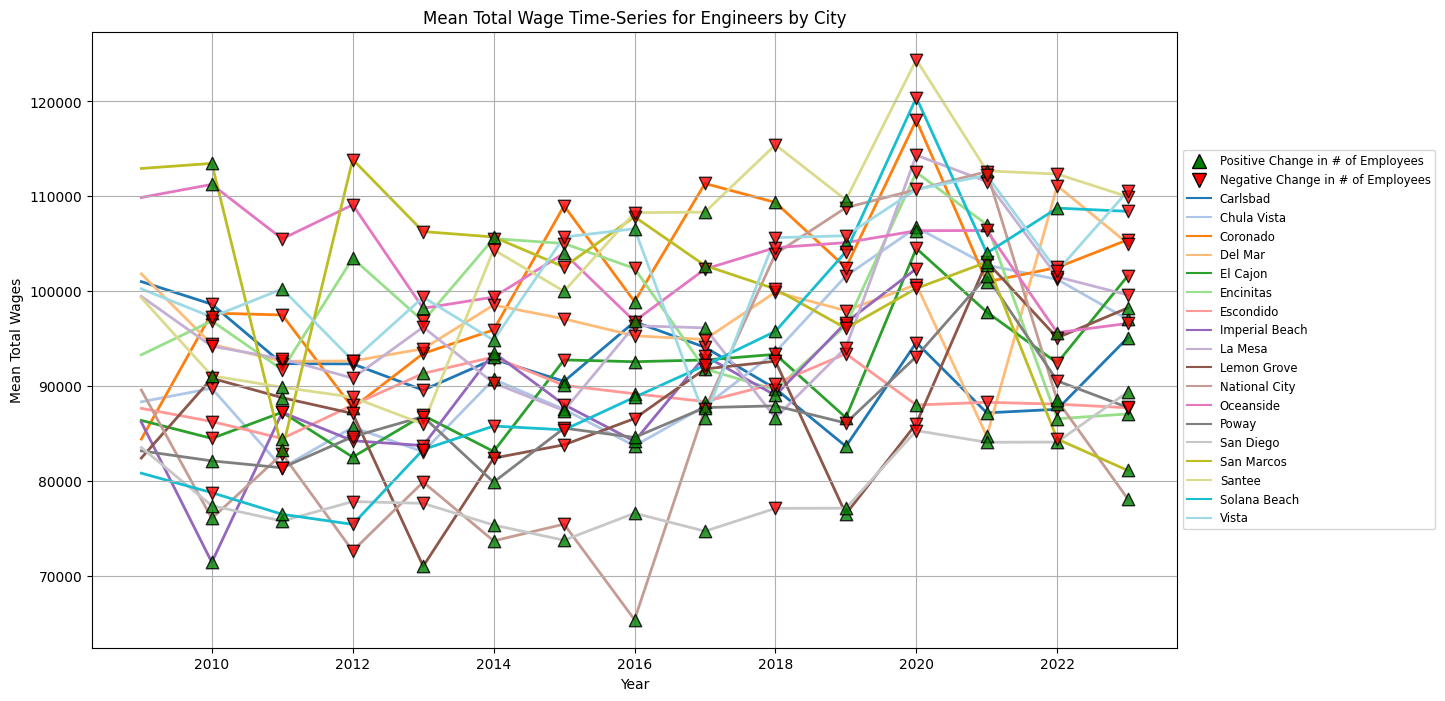

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_wage_timeseries(df, save_path):
    # Convert columns to appropriate types
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df['NumEmpls%Chg'] = df['NumEmpls%Chg'].astype(str).str.rstrip('%').astype('float') / 100.0
    df['MeanTotWage'] = pd.to_numeric(df['MeanTotWage'], errors='coerce')
    
    # Get a list of cities in the dataset
    cities = df['City'].unique()
    
    # Use a distinct color map that can generate unique colors for each city
    num_cities = len(cities)
    cmap = plt.get_cmap('tab20', num_cities)  # 'tab20' is good for categorical data with many distinct colors
    
    # Plotting
    plt.figure(figsize=(14, 8))

    city_colors = {}

    for i, city in enumerate(cities):
        city_data = df[df['City'] == city]
        
        # Separate the data into positive and negative employee change
        positive_change = city_data[city_data['NumEmpls%Chg'] > 0]
        negative_change = city_data[city_data['NumEmpls%Chg'] <= 0]
        
        # Assign and store a unique color for each city from the colormap
        color = cmap(i)
        city_colors[city] = color
        
        # Plot time-series for the city without markers on the line
        plt.plot(city_data['Year'], city_data['MeanTotWage'], label=city, color=color, linestyle='-', linewidth=2, zorder=1)
        
        # Overlay smaller markers for positive and negative employee changes with higher zorder
        plt.scatter(positive_change['Year'], positive_change['MeanTotWage'], 
                    color='green', marker='^', s=80, edgecolor='black', alpha=0.8, zorder=2)
        plt.scatter(negative_change['Year'], negative_change['MeanTotWage'], 
                    color='red', marker='v', s=80, edgecolor='black', alpha=0.8, zorder=2)
    
    plt.title(f'Mean Total Wage Time-Series for Engineers by City')
    plt.xlabel('Year')
    plt.ylabel('Mean Total Wages')
    
    # Create custom handles for the legend to only show one instance of the markers
    custom_handles = [
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Positive Change in # of Employees', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='red', markersize=10, label='Negative Change in # of Employees', markeredgecolor='black')
    ]
    
    # Add city-specific handles with unique colors
    city_handles = [plt.Line2D([0], [0], color=city_colors[city], label=city) for city in cities]
    
    plt.legend(handles=custom_handles + city_handles, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
    
    plt.grid(True)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')  # Use bbox_inches='tight' to avoid cutting off the legend
        
    plt.show()

# Example usage with your DataFrame
plot_wage_timeseries(grouped_filtered_df, r"C:\Users\Ericm\PycharmProjects\wageData\.venv\Scripts\EngineerWagesNumEmployeesViz.pdf")


In [35]:
grouped_filtered_df['City'] = grouped_filtered_df['City'].astype('category').cat.codes
grouped_filtered_df['Year'] = pd.to_numeric(grouped_filtered_df['Year'])

y = pd.to_numeric(grouped_filtered_df['MeanTotWage%Chg'], errors='coerce')
X = grouped_filtered_df[['City', 'Year', 'NumEmpls%Chg']]

X = sm.add_constant(X)

X = X.dropna()
y = y[X.index]

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        MeanTotWage%Chg   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     10.80
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           1.09e-06
Time:                        13:39:48   Log-Likelihood:                 267.64
No. Observations:                 248   AIC:                            -527.3
Df Residuals:                     244   BIC:                            -513.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.7984      2.648     -0.679   